In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# question1
data = pd.read_csv('userbehaviour.csv')

null_values = data.isnull().sum()
column_info = data.info()
descriptive_stats = data.describe()

null_values, column_info, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


(userid                        0
 Average Screen Time           0
 Average Spent on App (INR)    0
 Left Review                   0
 Ratings                       0
 New Password Request          0
 Last Visited Minutes          0
 Status                        0
 dtype: int64,
 None,
             userid  Average Screen Time  Average Spent on App (INR)  \
 count   999.000000           999.000000                  999.000000   
 mean   1500.000000            24.390390                  424.415415   
 std     288.530761            14.235415                  312.365695   
 min    1001.000000             0.000000                    0.000000   
 25%    1250.500000            12.000000                   96.000000   
 50%    1500.000000            24.000000                  394.000000   
 75%    1749.500000            36.000000                  717.500000   
 max    1999.000000            50.000000                  998.000000   
 
        Left Review     Ratings  New Password Request  Last Visi

In [3]:
# question2
highest_screen_time = data['Average Screen Time'].max()
lowest_screen_time = data['Average Screen Time'].min()
average_screen_time = data['Average Screen Time'].mean()

highest_screen_time, lowest_screen_time, average_screen_time

(50.0, 0.0, 24.39039039039039)

In [4]:
# question3
highest_spent = data['Average Spent on App (INR)'].max()
lowest_spent = data['Average Spent on App (INR)'].min()
average_spent = data['Average Spent on App (INR)'].mean()

highest_spent, lowest_spent, average_spent

(998.0, 0.0, 424.4154154154154)

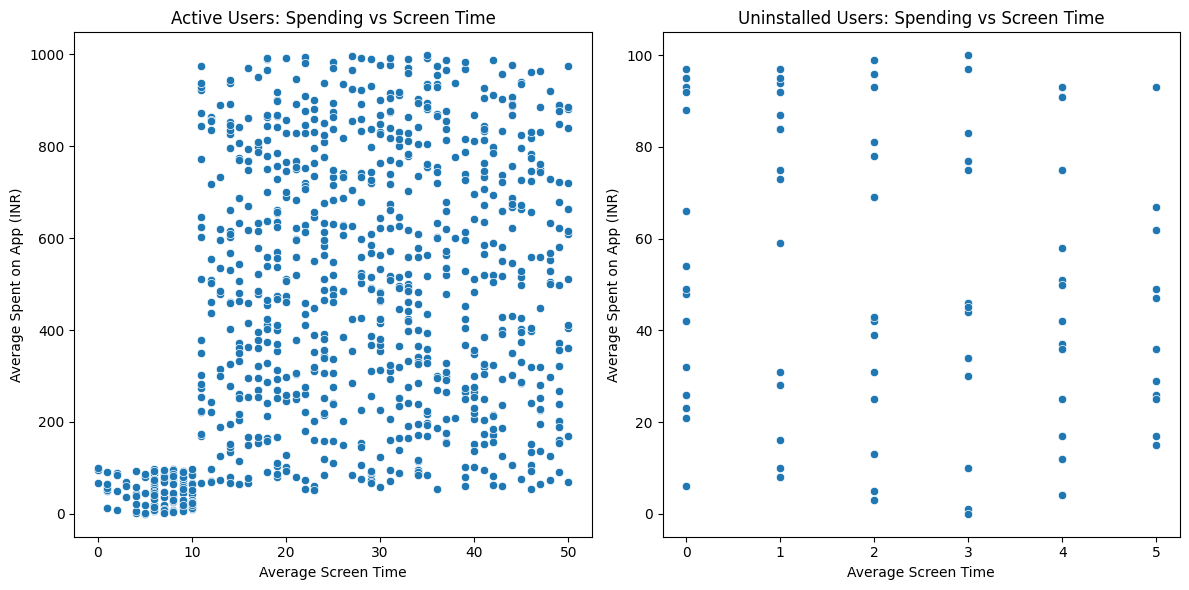

(                            Average Screen Time  Average Spent on App (INR)
 Average Screen Time                    1.000000                    0.337601
 Average Spent on App (INR)             0.337601                    1.000000,
                             Average Screen Time  Average Spent on App (INR)
 Average Screen Time                    1.000000                   -0.192659
 Average Spent on App (INR)            -0.192659                    1.000000)

In [5]:
# question4
active_users = data[data['Status'] == 'Installed']
uninstalled_users = data[data['Status'] == 'Uninstalled']

# Scatter plot for active users
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=active_users)
plt.title('Active Users: Spending vs Screen Time')

# Scatter plot for uninstalled users
plt.subplot(1, 2, 2)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=uninstalled_users)
plt.title('Uninstalled Users: Spending vs Screen Time')

plt.tight_layout()
plt.show()

# Correlation analysis
active_corr = active_users[['Average Screen Time', 'Average Spent on App (INR)']].corr()
uninstalled_corr = uninstalled_users[['Average Screen Time', 'Average Spent on App (INR)']].corr()

active_corr, uninstalled_corr

In [6]:
# Active Users:

# The scatter plot for active users shows the relationship between average screen time and average amount spent on the app.
# Observing this plot, we might see a trend indicating that users who spend more time on the app also tend to spend more money. This can be identified if there is a cluster of points trending upwards as screen time increases.


# Uninstalled Users:

# The scatter plot for uninstalled users provides insights into the spending behavior of users who have left the app.
# By comparing this plot to the one for active users, we can identify differences in behavior. For instance, if users with high screen time and low spending tend to uninstall the app, this might suggest that lack of engagement (despite high usage) could be a factor in churn.

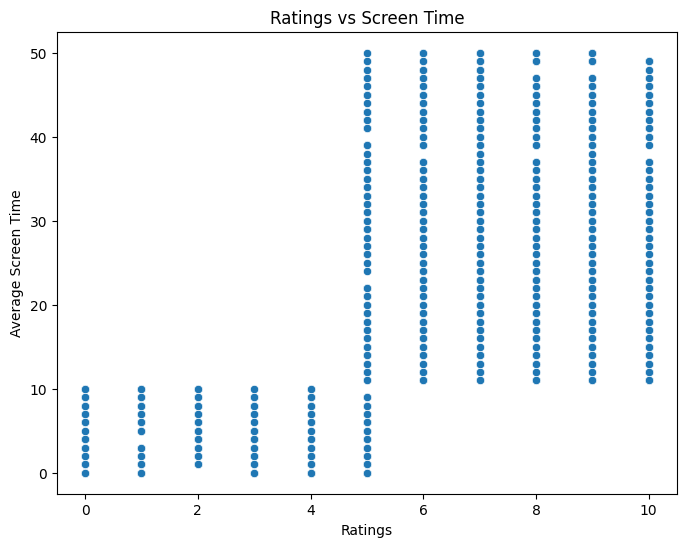

,Ratings,Average Screen Time
Ratings,1.000000,0.557624
Average Screen Time,0.557624,1.000000


In [7]:
# question5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Average Screen Time', data=data)
plt.title('Ratings vs Screen Time')
plt.show()

# Correlation analysis
ratings_corr = data[['Ratings', 'Average Screen Time']].corr()

ratings_corr

In [8]:
# Visualizes the relationship between user ratings and average screen time.
# Identifies any visible trends or patterns indicating how ratings correlate with screen time.
# An upward trend suggests higher ratings correlate with more screen time.
# A downward trend indicates higher ratings correlate with less screen time.
# No clear trend suggests little relationship between ratings and screen time.

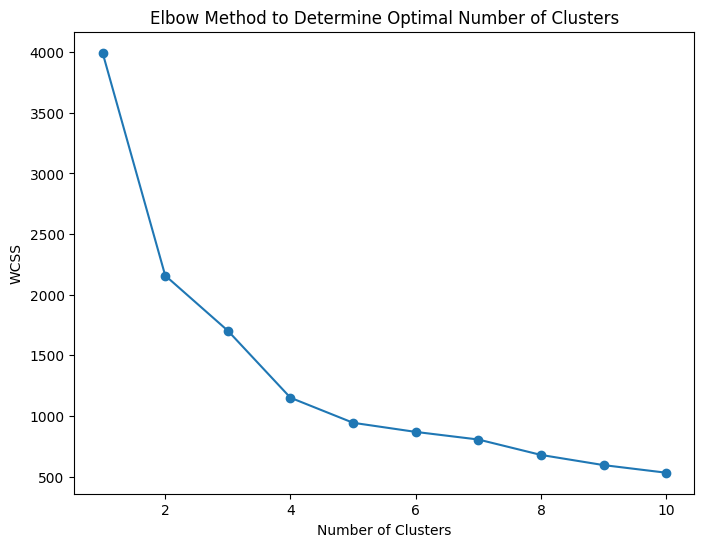

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# question6

features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph to determine the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)



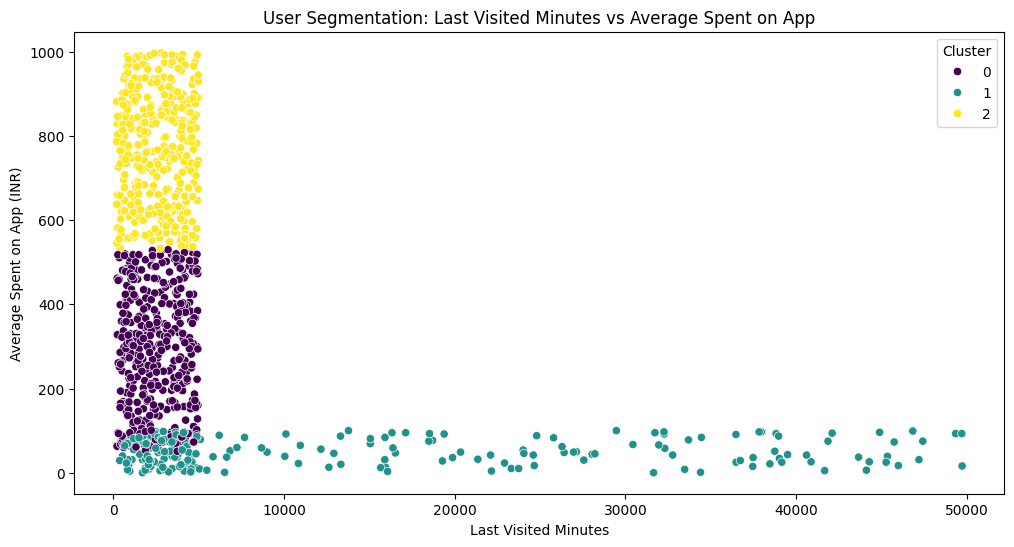

In [10]:

# question7
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Cluster', data=data, palette='viridis')
plt.title('User Segmentation: Last Visited Minutes vs Average Spent on App')
plt.show()



In [11]:
# question8

# Data Import and Initial Analysis:
# Checked for null values, column info, and descriptive statistics.
# Found that there were no null values and described the basic statistics of the data.

# Analyzed Screen Time and Spending:
# Found the highest, lowest, and average screen time and spending.

# Relationship Analysis:
# Explored the relationship between spending capacity and screen time for active and uninstalled users.
# Explored the relationship between ratings and average screen time.

# User Segmentation:
# Applied K-means clustering to segment users based on their behaviors.
# Determined the optimal number of clusters using the Elbow method.
# Visualized the clusters.

#Correlation Matrix Analysis

# Anomaly Detection using Isolation Forest:
# Inspect the data
# Select Relevant Features for Anomaly Detection
# Format and Display the Results


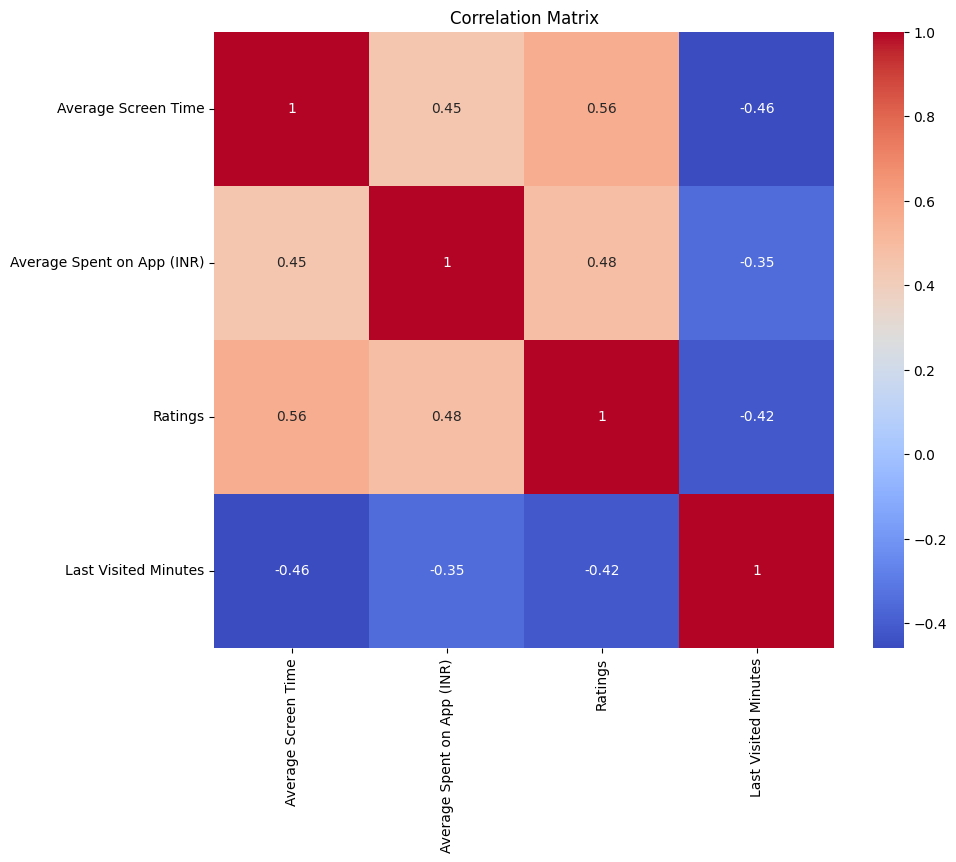

In [12]:
# question9
correlation_matrix = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'Last Visited Minutes']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# question10

# displaying some rows for understanding data 
print(data.head())
print(data.columns)


   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Cluster  
0        9                     7                  2990    Installed        2  
1        4                     8                 24008  Uninstalled        1  
2        8                     5                   971    Installed        0  
3        6                     2                   799    Installed        0  
4        5                     6                  3668    Installed        0  
Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
     

In [14]:
from sklearn.ensemble import IsolationForest


features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Last Visited Minutes']]

iso_forest = IsolationForest(contamination=0.1, random_state=0)
data['Anomaly'] = iso_forest.fit_predict(features)

data['Anomaly'] = data['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})


In [15]:

data_with_anomalies = data[['userid', 'Average Screen Time', 'Average Spent on App (INR)', 'Last Visited Minutes', 'Anomaly']]
print(data_with_anomalies)

# saving data to a new file
data_with_anomalies.to_csv('anomalies_detected.csv', index=False)


     userid  Average Screen Time  Average Spent on App (INR)  \
0      1001                 17.0                       634.0   
1      1002                  0.0                        54.0   
2      1003                 37.0                       207.0   
3      1004                 32.0                       445.0   
4      1005                 45.0                       427.0   
..      ...                  ...                         ...   
994    1995                 38.0                       938.0   
995    1996                 43.0                        61.0   
996    1997                 47.0                       761.0   
997    1998                  6.0                        73.0   
998    1999                  9.0                        54.0   

     Last Visited Minutes  Anomaly  
0                    2990   Normal  
1                   24008  Anomaly  
2                     971   Normal  
3                     799   Normal  
4                    3668   Normal  
..       

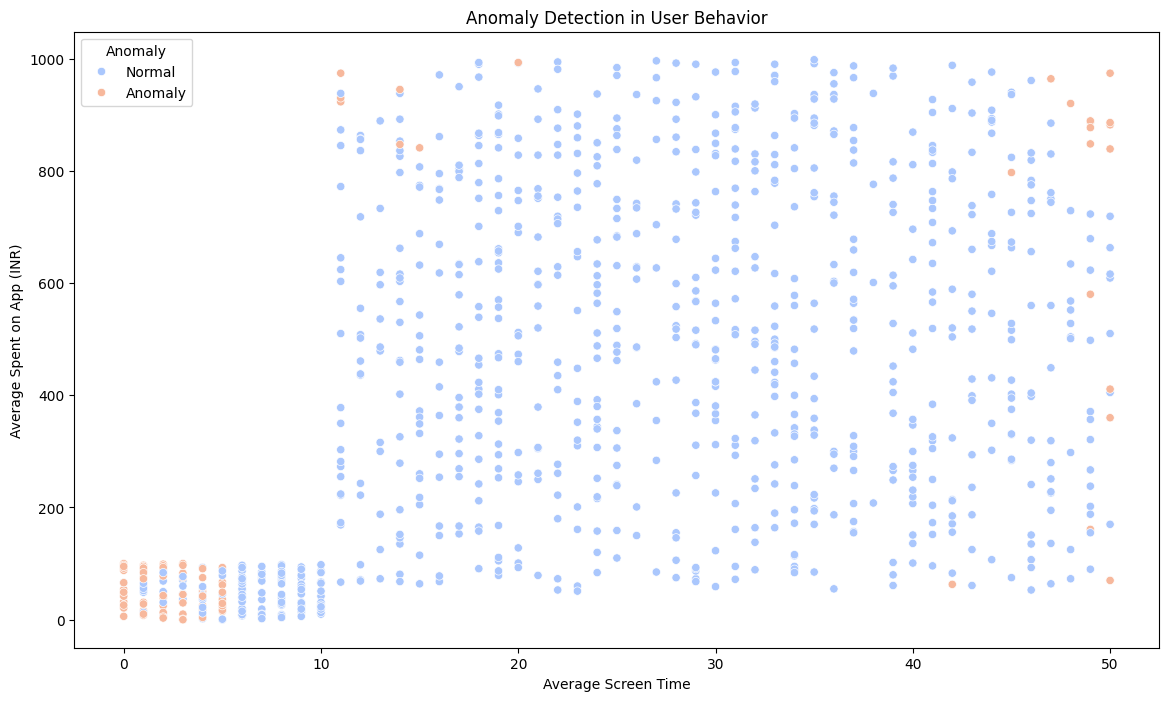

In [16]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_with_anomalies, x='Average Screen Time', y='Average Spent on App (INR)', hue='Anomaly', palette='coolwarm')
plt.title('Anomaly Detection in User Behavior')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.legend(title='Anomaly')
plt.show()